# Data: Past, Present, Future |  Lab 4  |  2/14/2018


## smoothing, regression, and arguing reality 


#### Making smoothing "real" at the dawn of the 20th Century

In 1905 a New York Lawyer named Charles Evans Hughes put American corporations on trial: namely, the Big 5 insurances companies at the time had steadily raised salaries of high-ranking employees even as policyholder dividends continued to fall [1]. Hughes was tasked with running a state investigation colloquially known as the "Armstrong investigation" to find out why, and began interviewing some of the very people whose high salaries were being questioned. Particularly sensational to the reading public following this "investigation" was the discovery that insurance actuaries did not use the empirically observed number of deaths, expense account balances, or exact annual interests on investiments [2]. Instead insurance companies <b>calculated "smoothed curves" from data, arguing that such smoothed curves more accurately  described reality</b>. Here early 20th C actuaries were borrowing a page from early 19th C astronomers. For astronomers, the mean position of, say, the position of a star in the sky became its *real* position, even if the mean matched no particular observation, as long as the errors of observation could be assumed to be random. This was a kind of smoothing via least squares [3]. Perhaps this makes sense when observing an object in the sky, but did it make sense to treat errors as deviations: to smooth life expectancies, expense sheets, annual investiment interest and treat these as the "correct" values to calculate risk, make business decisions, and mail annuity payments? Many in life insurance thought it did. In fact, some in insurance saw smoothing as a way not merely to describe society and assign individual risk, but even as a means of improving society by attempting to decrease individual statistical risks, as can be seen in this plot in a book co-authored by Louis Dublin, a vice-president of MET Life Insurance Company in 1931 [4]:

![pg.195.png](pg.195.png)

<small>
[1] For a discussion of the Armstrong Investigation, smoothing, and other details discussed above, see chapter 4 in Dan Bouk's _How Our Days Became Numbered_ (2015).
[2] Bouk, 93. 
[3] Desrosières, _The Politics of Large Numbers_ (2002), chapter 3.
[4] Louis Dublin and Alfred Lotka, _Length of life; a study of the life table_, 191-195. 
</small>

<b> In this lab we're going to try out several forms of smoothing in this lab.</b> To begin, let's construct a life expectancy plot like that above. We'll start with three lists which contains the age of death for three different careers: poets, singers, and writers. (Importantly we haven't told you where we got this data so you should immediately be suspicious of this data!)

In [1]:
poet_death = [24,25,26,28,29,29,29,30,32,33,36,36,37,37,37,37,38,38,39,39,39,39,40,41,42,42,
                 42,42,43,44,44,45,45,45,46,46,46,46,46,47,47,47,48,48,49,49,49,50,50,51,51,51,
                 52,52,52,52,52,53,53,53,54,54,55,55,55,55,56,56,56,56,56,57,57,57,58,58,58,58,
                 59,59,59,59,59,60,60,61,61,62,62,62,62,63,64,64,65,65,65,65,66,66,66,66,67,67,
                 67,67,67,68,68,68,68,68,68,68,68,69,69,69,69,69,69,69,69,70,70,70,70,70,71,71,
                 71,71,71,71,71,71,71,72,72,73,73,73,73,73,73,74,74,74,74,74,74,74,74,74,74,75,
                 75,75,75,75,75,76,76,76,77,77,77,77,78,78,78,78,79,79,79,79,79,79,79,80,80,80,
                 80,81,81,81,81,81,81,81,81,81,82,82,83,83,83,83,83,83,83,83,83,84,84,84,84,85,
                 85,85,85,85,85,85,86,86,86,86,87,87,88,88,88,89,89,89,89,89,89,89,90,90,90,91,
                 91,91,93,93,94,101,107]

singer_death = [21,27,30,33,40,42,43,44,45,46,47,52,53,53,53,54,55,57,60,61,65,69,69,70,72,72,
                75,77,78,78,79,80,81,82,83,84,85,88,89,93,96]

writer_death = [29,30,34,38,39,40,40,42,43,44,48,48,50,51,51,52,52,52,54,55,55,55,56,56,57,57,
                57,57,57,58,60,60,60,60,60,61,61,61,62,62,63,63,63,64,64,64,65,65,65,65,65,65,
                66,66,67,67,67,67,68,68,68,69,69,69,70,70,71,71,71,71,71,71,71,72,72,72,73,73,
                74,74,74,75,75,75,75,76,76,76,76,77,77,77,77,77,78,78,78,79,79,79,80,80,80,80,
                81,81,81,81,82,82,82,82,83,83,84,84,85,86,87,88,88,88,89,89,89,90,90,95,95,96,
                50]

We'll also need to import a few libraries! 

In [2]:
# import pandas library, denoting library as "pd"
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# import a bit of ipython "magic" to get graphs to display in jupyter notebook
%pylab inline           

Populating the interactive namespace from numpy and matplotlib


Now let's ingest the data into pandas: 

In [3]:
poet_lifespans=pd.DataFrame(poet_death)
singer_lifespans=pd.DataFrame(singer_death)
writer_lifespans=pd.DataFrame(writer_death)

What's the longest living writer, singer, and poet in the dataset?

In [4]:
print("oldest singer: " + str(singer_lifespans.max().item()))
print("oldest poet: " + str(poet_lifespans.max().item()))
print("oldest writer: "+ str(writer_lifespans.max().item()))

oldest singer: 96
oldest poet: 107
oldest writer: 96


What's happening above? Let's consider just the singers:
1. First we select the max value: 
<code>singer_lifespans.max()</code>
2. Then we pull that value out of the data set as a number via the .item(): 
<code>singer_lifespans.max().item()</code>
3. Finally, we wrap the number in a string so to print out the number: 
<code>str(singer_lifespans.max().item())</code>


Likewise, let's now calculate the life expectancy for these three different professions.  

In [5]:
print("singer life expectancy: " + str(singer_lifespans.mean().item()))
print("poet life expectancy: " + str(poet_lifespans.mean().item()))
print("writer life expectancy: " + str(writer_lifespans.mean().item()))

singer life expectancy: 62.951219512195124
poet life expectancy: 66.26141078838174
writer life expectancy: 68.22900763358778


The curve that we saw Dublin and Lotka provide above is often called a survivor curve. Let's compare the survivor curves for poets, singers, and writers. Let's start with poets. 

What we need to generate a list called "poet_survivors_percentages" in which each element of the list is the percentage of the survivors for a given year:

![poet-survivor-list.jpeg](poet-survivor-list.jpeg)


We're going to use a for loop to generate this list. Here is what we need to do: 

For age X, running from age 0 to the oldest poet age: 
1. Grab poets alive at age X, i.e., poet_lifespans[poet_lifespans >= age]. 
    All people younger than age X will return NaN, i.e., NaN = "not a number". 
2. Drop all poets who died at younger age (by dropping all NaN elements), i.e., .dropna().
3. Now count up total number of remaining elements, i.e., .size. Note that this is the number of people still alive. 
4. Divide the number of living poets at age X by total number of poets in sample to get fraction of poets alive at age X. 
5. Add this fraction alive at age X to the list "poet_survivors_percentages".
6. Repeat steps 1 - 5 until age X > oldest poet age. 

We need to do the above steps for each profession too. 

Earlier we noticed that the oldest poet lived to 107 years old so we'll want to be sure our x-axis goes to at least 107. Note that the "current_age" list we generate below contains the specific age for each element of the poet_survivor_precentages list. This will be used as x-axis positions for each (y-axis) life expectancy value for a given age and profession. 

In [6]:
# generate survivorship curves for singers, writers, and poets

poet_survivors = []
poet_survivor_percentages = []
singer_survivors = []
singer_survivor_percentages = []
writer_survivors = []
writer_survivor_percentages = []

current_age = []
total_poets = poet_lifespans.size      # total number of poets in sample
total_singers = singer_lifespans.size  # total number of singers in sample 
total_writers = writer_lifespans.size  # total number of writers in sample

for age in range(0, poet_lifespans.max().item()):
    poet_survivors = poet_survivors + [poet_lifespans[poet_lifespans >= age].dropna().size]
    poet_survivor_percentages = poet_survivor_percentages + [poet_survivors[age]/total_poets]
    
    singer_survivors = singer_survivors + [singer_lifespans[singer_lifespans >= age].dropna().size]
    singer_survivor_percentages = singer_survivor_percentages + [singer_survivors[age]/total_singers]
    
    writer_survivors = writer_survivors + [writer_lifespans[writer_lifespans >= age].dropna().size]
    writer_survivor_percentages = writer_survivor_percentages + [writer_survivors[age]/total_writers]
    
    current_age = current_age + [age]

Now we want to put all these survivor percentages into a pandas dataframe:

In [7]:
survivorship_percentages = pd.DataFrame(
                            {"age": current_age,
                            "poet survivor percentage": poet_survivor_percentages,
                            "singer survivor percentage": singer_survivor_percentages, 
                            "writer survivor percentage": writer_survivor_percentages 
                            })

survivorship_percentages

,age,poet survivor percentage,singer survivor percentage,writer survivor percentage
0,0,1.000000,1.000000,1.000000
1,1,1.000000,1.000000,1.000000
2,2,1.000000,1.000000,1.000000
3,3,1.000000,1.000000,1.000000
4,4,1.000000,1.000000,1.000000
5,5,1.000000,1.000000,1.000000
6,6,1.000000,1.000000,1.000000
7,7,1.000000,1.000000,1.000000
8,8,1.000000,1.000000,1.000000
9,9,1.000000,1.000000,1.000000


Now let's graph these survivor curves for each profession:

Text(0,0.5,'percentage still living')

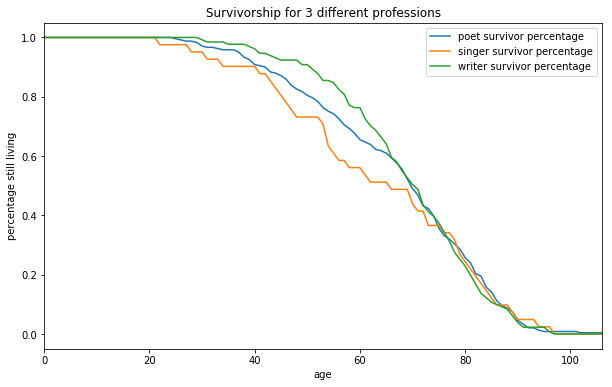

In [8]:
survivorship_percentages.plot(x="age", y=["poet survivor percentage", 
                              "singer survivor percentage", 
                              "writer survivor percentage"], figsize=[10,6],
                              title="Survivorship for 3 different professions")
plt.ylabel('percentage still living')


The above is the same survivor graph as Dublin and Lotka provided above. <b>What information does this graph propose to present?</b> If we choose to use the above graph to predict the future rather than to merely describe the past, which profession (or professions) should you choose to maximize your life (assuming your only 3 options are between being a singer, poet, or writer)? 

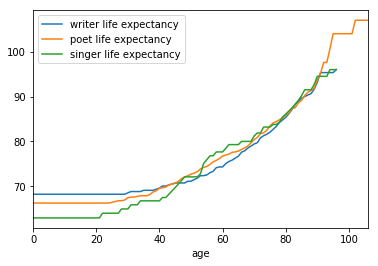

In [9]:
# calculating mean life expectancy at different ages
# note 1. We use poet lifespan max to keep columns all the same size for graphing
# note 2. We separate our for loops to make it easier to follow 

poet_life_expectancy = []
current_age = []
for age in range(0, poet_lifespans.max().item()):
    poet_life_expectancy = poet_life_expectancy + [poet_lifespans[poet_lifespans >= age].mean().item()]
    current_age = current_age + [age]
    
singer_life_expectancy = []
for age in range(0, poet_lifespans.max().item()):
    singer_life_expectancy = singer_life_expectancy + [singer_lifespans[singer_lifespans >= age].mean().item()]   

writer_life_expectancy = []
for age in range(0, poet_lifespans.max().item()):
    writer_life_expectancy = writer_life_expectancy + [writer_lifespans[writer_lifespans >= age].mean().item()]       
    

 
life_expectancy_at_different_ages = pd.DataFrame(
        {"age": current_age,
         "writer life expectancy": writer_life_expectancy,
         "poet life expectancy": poet_life_expectancy,
         "singer life expectancy": singer_life_expectancy
        })


life_expectancy_at_different_ages.plot(x="age", y=["writer life expectancy", "poet life expectancy",
                                                        "singer life expectancy" ])
